# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 4: ML Applications - Vehicle Motion State Classification*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Daniel | Polania | Daniel Polania 2024-11-24 | 10 | 33.3% |
| Member 2: | Wutikeer | Tuerxun | Wutikeer Tuerxun 2024-11-24 | 10 | 33.3% |
| Member 3: | Mohammadamir | Zarpanahfard | Mohammadamir Zarpanahfard 2024-11-24 | 10 | 33.3% |



---

## Section 1 - Motion Classification Using *All Features* Derived From Inertial Sensor Data (33 Marks)

---

### 1.1 Assignment datasets import (6 Marks)

---

In [ ]:
# some library imports
import pandas as pd

First load the following datasets into dataframes.
* *UrbanNav-HK_Whampoa-20210521_sensors.csv* to dataframe variable named *cv_set*. This dataset is to be used for model training and hyper parameter tuning.
* *UrbanNav-HK_TST-20210517_sensors.csv* to dataframe variable named *test_set1*. This is first independent test dataset.
* *2020-03-14-16-45-35.csv* to dataframe variable named *test_set2*. This is the second independent test dataset.

In [ ]:
%ls

 Volume in drive C is Windows
 Volume Serial Number is 904E-E7B3

 Directory of C:\Users\Daniel Polania\Desktop\MEng\Digital Engineering\Labs\Lab 4

2024-11-22  04:59 PM    <DIR>          .
2024-11-22  04:54 PM    <DIR>          ..
2024-11-22  04:57 PM    <DIR>          .ipynb_checkpoints
2024-11-22  04:54 PM           206,187 2020-03-14-16-45-35.csv
2024-11-22  04:59 PM            45,747 Assignment 4.ipynb
2024-11-22  04:54 PM           913,795 ENGG680_Lab4_F24.pdf
2024-11-22  04:54 PM           546,767 UrbanNav-HK_TST-20210517_sensors.csv
2024-11-22  04:54 PM         1,070,856 UrbanNav-HK_Whampoa-20210521_sensors.csv
               5 File(s)      2,783,352 bytes
               3 Dir(s)  658,061,189,120 bytes free


In [ ]:
# (2 marks)
# TODO: Load cross validation/training dataset (UrbanNav-HK_Whampoa-20210521_sensors.csv) to 'cv_set' dataframe

# uncomment and compelete below
cv_set = pd.read_csv('UrbanNav-HK_Whampoa-20210521_sensors.csv')

# TODO: Load UrbanNav-HK_TST-20210517_sensors.csv to 'test_set1' dataframe
test_set1 = test_set1 = pd.read_csv('UrbanNav-HK_TST-20210517_sensors.csv')

# TODO: Load 2020-03-14-16-45-35.csv to 'test_set2' dataframe
test_set2 = test_set2 = pd.read_csv('2020-03-14-16-45-35.csv')


cv_set - First 5 rows:
     ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum     a_sum  \
0 -0.003929 -0.093081  9.789349 -0.002649  0.001406 -0.001391  9.797418   
1 -0.000966 -0.092417  9.789095 -0.001806  0.000103 -0.001943  9.798815   
2 -0.008014  0.037066  9.792780 -0.001129  0.001207  0.005840  9.805465   
3 -0.097655  0.286081  9.781135 -0.000960  0.002518  0.076946  9.792874   
4 -0.239673  0.288418  9.779307 -0.001625  0.005648  0.157407  9.794137   

      g_sum        ax_var        ay_var  ...     g_min    ax_max    ay_max  \
0  0.022554  8.046094e-07  1.319665e-07  ...  0.000003  0.001496  0.000544   
1  0.021731  1.032619e-06  1.073067e-07  ...  0.000006  0.001865  0.000615   
2  0.024407  1.128046e-06  4.231253e-07  ...  0.000003  0.003009  0.002097   
3  0.080408  7.988949e-07  6.873045e-08  ...  0.000052  0.001546  0.001457   
4  0.158930  8.240663e-07  1.143863e-07  ...  0.000233  0.001387  0.001681   

     az_max    gx_max    gy_max    gz_max     a_max     g

For the *cv_set*, look at the dataframe head and info, and print the list of all columns. The *test_set1* and *test_set2* have the same schema as *cv_set*, however, have different number of rows (samples).

In [ ]:
# TODO: Display first two rows of cv_set
# (1 mark)
# Display the first few rows of cv_set
print("cv_set - First 5 rows:")
print(cv_set.head(2))

cv_set - First 5 rows:
     ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum     a_sum  \
0 -0.003929 -0.093081  9.789349 -0.002649  0.001406 -0.001391  9.797418   
1 -0.000966 -0.092417  9.789095 -0.001806  0.000103 -0.001943  9.798815   

      g_sum        ax_var        ay_var  ...     g_min    ax_max    ay_max  \
0  0.022554  8.046094e-07  1.319665e-07  ...  0.000003  0.001496  0.000544   
1  0.021731  1.032619e-06  1.073067e-07  ...  0.000006  0.001865  0.000615   

     az_max    gx_max    gy_max    gz_max     a_max     g_max  motion_state  
0  0.024992  0.000110  0.000075  0.000078  0.024997  0.000187          rest  
1  0.024828  0.000124  0.000098  0.000090  0.024829  0.000144          rest  

[2 rows x 33 columns]


In [ ]:
# TODO: Load the info method of cv_set
# (1 mark)
# Display information about the cv_set dataframe
print("\ncv_set - Dataframe Info:")
print(cv_set.info())

# Display information about the test_set1 dataframe
print("\ntest_set1 - Dataframe Info:")
print(test_set1.info())

# Display information about the test_set2 dataframe
print("\ntest_set2 - Dataframe Info:")
print(test_set2.info())


cv_set - Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ax_sum        1534 non-null   float64
 1   ay_sum        1534 non-null   float64
 2   az_sum        1534 non-null   float64
 3   gx_sum        1534 non-null   float64
 4   gy_sum        1534 non-null   float64
 5   gz_sum        1534 non-null   float64
 6   a_sum         1534 non-null   float64
 7   g_sum         1534 non-null   float64
 8   ax_var        1534 non-null   float64
 9   ay_var        1534 non-null   float64
 10  az_var        1534 non-null   float64
 11  gx_var        1534 non-null   float64
 12  gy_var        1534 non-null   float64
 13  gz_var        1534 non-null   float64
 14  a_var         1534 non-null   float64
 15  g_var         1534 non-null   float64
 16  ax_min        1534 non-null   float64
 17  ay_min        1534 non-null   float64
 18  az

In [ ]:
# TODO: Display the number of rows and columns  of all three datasets
# (1 mark)
print(f"'cv_set' has {1534} rows and {33} columns")
print(f"'test_set1' has {783} rows and {33} columns")
print(f"'test_set2' has {297} rows and {33} columns")

'cv_set' has 1534 rows and 33 columns
'test_set1' has 783 rows and 33 columns
'test_set2' has 297 rows and 33 columns


In [ ]:
# TODO: Display all columns in cv_set
# (1 mark)
# List all columns in cv_set
print("\nList of all columns in cv_set:")
print(cv_set.columns.tolist())


List of all columns in cv_set:
['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum', 'a_sum', 'g_sum', 'ax_var', 'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var', 'a_var', 'g_var', 'ax_min', 'ay_min', 'az_min', 'gx_min', 'gy_min', 'gz_min', 'a_min', 'g_min', 'ax_max', 'ay_max', 'az_max', 'gx_max', 'gy_max', 'gz_max', 'a_max', 'g_max', 'motion_state']


In all three dataframes, target vector is stored in the *motion_state* column. All other columns are features.

___

### 1.2 - Grid Search with Cross Validation (18 Marks)

___

#### 1.2.1 - Extract all features and target from cv_set

___

From the *cv_set*, load the target vector stored in the *motion_state* column into a new variable *y*

In [ ]:
# TODO - Load target vector into y
# (1 mark)
y = cv_set['motion_state']
print("Target vector y - First 5 rows:")
print(y.head())

Target vector y - First 5 rows:
0        rest
1        rest
2    straight
3        turn
4        turn
Name: motion_state, dtype: object


From *cv_set*, load all features, that is all columns except for the target vector, in a new dataframe variable *X*

In [ ]:
# TODO - Load all features from cv_set to X
# (2 marks)
# Extract all features (all columns except 'motion_state') into a new dataframe X
X = cv_set.drop(columns=['motion_state'])

# Optionally, print the first few rows of X to verify
print("Features dataframe X - First 5 rows:")
print(X.head())

Features dataframe X - First 5 rows:
     ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum     a_sum  \
0 -0.003929 -0.093081  9.789349 -0.002649  0.001406 -0.001391  9.797418   
1 -0.000966 -0.092417  9.789095 -0.001806  0.000103 -0.001943  9.798815   
2 -0.008014  0.037066  9.792780 -0.001129  0.001207  0.005840  9.805465   
3 -0.097655  0.286081  9.781135 -0.000960  0.002518  0.076946  9.792874   
4 -0.239673  0.288418  9.779307 -0.001625  0.005648  0.157407  9.794137   

      g_sum        ax_var        ay_var  ...     a_min     g_min    ax_max  \
0  0.022554  8.046094e-07  1.319665e-07  ...  0.023871  0.000003  0.001496   
1  0.021731  1.032619e-06  1.073067e-07  ...  0.024153  0.000006  0.001865   
2  0.024407  1.128046e-06  4.231253e-07  ...  0.023738  0.000003  0.003009   
3  0.080408  7.988949e-07  6.873045e-08  ...  0.024122  0.000052  0.001546   
4  0.158930  8.240663e-07  1.143863e-07  ...  0.023710  0.000233  0.001387   

     ay_max    az_max    gx_max    gy_max  

___

#### 1.2.2 - Configure and Perform Grid Search with Cross-Validation

___

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import GridSearchCV

The dataset *(X, y)*, must be split into training/validation *(X_train, y_train)* and testing *(X_test, y_test)* sets. Use the `train_test_split` function from sklearn to create the split, where  **30%** of data is used for testing. Set the `random_state=42`, and `stratify=y`.  

In [ ]:
# TODO - Perform test/train split
# (1 mark)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Initialize a `Pipeline`, consisting of a *scaler* and a *classifer*, set the default values to *StandardScaler()*, and *SVC()*, respectively.

In [ ]:
# TODO - Initialize Pipeline into variable pipe
# (2 marks)
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Scaler step
    ('svm', SVC(random_state=42))  # SVC step with a fixed random_state for reproducibility
])

# Optionally, print the pipeline to verify
print(pipe)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(random_state=42))])


Define the grid search configuration (*param_grid*) for training and hyper parameter tuning of the *support vector classifier*. Tune, the hyper-parameter *C*, over the interval `C=[0.01, 0.1, 1 ,10,100]`, *gamma*, over the interval `gamma=[0.001, 0.01, 0.1,1]`, and use the *radial basis function* as the kernel. For the *scaler* parameter, test with the `StandardScaler`, `RobustScaler`, and `None` options.

In [ ]:
# TODO - Setup grid set
# (4 marks)

param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],  # Different scalers to test
    'svm__C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter (C)
    'svm__gamma': [0.001, 0.01, 0.1, 1],  # Gamma values to test
    'svm__kernel': ['rbf']  # Using Radial Basis Function (RBF) kernel
}

In [ ]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC(random_state=42))]),
             param_grid={'scaler': [StandardScaler(), RobustScaler(), None],
                         'svm__C': [0.01, 0.1, 1, 10, 100],
                         'svm__gamma': [0.001, 0.01, 0.1, 1],
                         'svm__kernel': ['rbf']},
             return_train_score=True, scoring='accuracy')

___

#### 1.2.3 - Visualize Grid Search Results

___

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search
# (2 marks)

# 1. Best parameter set
print("Best parameter set:")
print(grid.best_params_)

# 2. Best cross-validation train score
# grid.cv_results_['mean_train_score'] gives the mean train score for each parameter set
best_train_score = grid.best_score_
print("\nBest cross-validation train score:")
print(best_train_score)

# 3. Best cross-validation test score
# To access the best cross-validation test score, we need to retrieve it from the grid's result
# grid.best_index_ gives the index of the best performing model based on the grid search
best_index = grid.best_index_
best_test_score = grid.cv_results_['mean_test_score'][best_index]
print("\nBest cross-validation test score:")
print(best_test_score)

# 4. Test set accuracy (score on the independent test set)
# After finding the best model, we can evaluate it on the test set (X_test, y_test)
test_score = grid.best_estimator_.score(X_test, y_test)
print("\nTest set accuracy:")
print(test_score)

Best parameter set:
{'scaler': RobustScaler(), 'svm__C': 100, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}

Best cross-validation train score:
0.9496718104759834

Best cross-validation test score:
0.9496718104759834

Test set accuracy:
0.9566160520607375


Display the confusion matrix and print the classification report for the trained model. Use the *(X_test, y_test)* dataset. **Hint** - You can use your code from assignment 3.

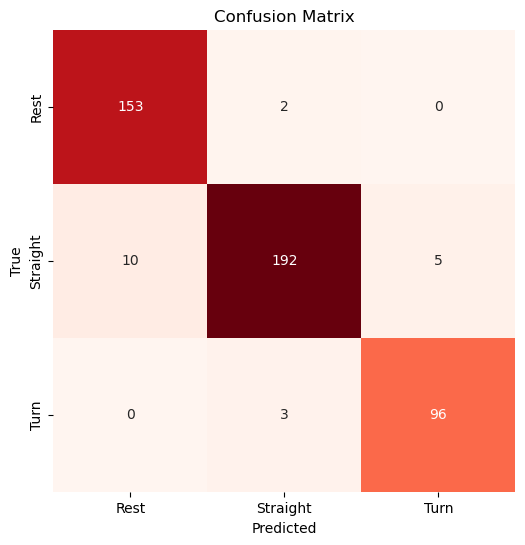


Classification Report:
              precision    recall  f1-score   support

        rest       0.94      0.99      0.96       155
    straight       0.97      0.93      0.95       207
        turn       0.95      0.97      0.96        99

    accuracy                           0.96       461
   macro avg       0.95      0.96      0.96       461
weighted avg       0.96      0.96      0.96       461



In [ ]:
# TODO - Display confusion matrix and print classification report for (X_test, y_test)
# (2 marks)
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Get the best model from the grid search
best_model = grid.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# 1. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, square=True, cbar=False, annot=True, fmt='d', cmap='Reds', xticklabels=['Rest', 'Straight', 'Turn'], yticklabels=['Rest', 'Straight', 'Turn'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 2. Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

___

#### 1.2.4 - Questions

1. Comment on the fit of the model to the dataset? (2 marks)
2. In the grid search, are the intervals used for *C* and *gamma* hyperparameters suitable? Why or why not? (2 marks)

#### 1.2.4 - Answers
**1.** **The overall accuracy** is 96%, which indicates that the model predicts the motion state correctly for the majority of test samples.  **Confusion Matrix Insights:** Rest: Very few misclassifications (2 as "straight" and 0 as "turn"). Straight: A small number of misclassifications (10 as "rest" and 5 as "turn"). Turn: Minimal misclassification (3 as "straight" and 0 as "rest").  Precision, Recall, and F1-Score: All metrics are around 0.95 or higher for every class, demonstrating a well-balanced model performance.

**2.** **They are appropriate** because they span a wide range of values, allowing the grid search to explore both under-regularized and over-regularized models.  **C:** Covers a broad range, from low regularization (0.01) to very high regularization (100), ensuring that both simple and complex decision boundaries are tested.  **gamma:** Includes both low values (0.001, 0.01) for smoother decision boundaries and higher values (0.1, 1) for more complex boundaries.

___

### 1.3 - Model Evaluation on Test Datasets 1 and 2 (9 Marks)

___

#### 1.3.1 - Extract all features and targets from test datasets

Next, the model trained in 1.2 will be tested on independent datasets, that is *test_set1* and *test_set2*. <br>
The test_sets must be seperated into features (Xs) and targets (ys).

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
# (1 marks)
y1 = test_set1['motion_state']
X1 = test_set1.drop(columns=['motion_state'])
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [ ]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2.drop(columns=['motion_state'])
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


____

#### 1.3.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
# (1 marks)

# Get the best model from the grid search
best_model = grid.best_estimator_

# Calculate and print the accuracy for test_set1
test_accuracy1 = best_model.score(X1, y1)
print(f"Test Set 1 Accuracy: {test_accuracy1:.4f}")

# Calculate and print the accuracy for test_set2
test_accuracy2 = best_model.score(X2, y2)
print(f"Test Set 2 Accuracy: {test_accuracy2:.4f}")

Test Set 1 Accuracy: 0.9208
Test Set 2 Accuracy: 0.2525


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

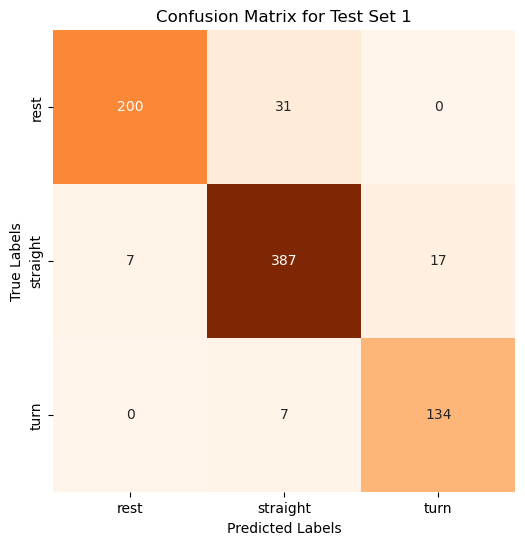

Classification Report for Test Set 1:
              precision    recall  f1-score   support

        rest       0.97      0.87      0.91       231
    straight       0.91      0.94      0.93       411
        turn       0.89      0.95      0.92       141

    accuracy                           0.92       783
   macro avg       0.92      0.92      0.92       783
weighted avg       0.92      0.92      0.92       783



In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
# (1 marks)

# Predict the target values using the trained model for test_set1
y_pred1 = best_model.predict(X1)

# Generate confusion matrix for test_set1
cm1 = confusion_matrix(y1, y_pred1)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Oranges',cbar=False, square=True, xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title("Confusion Matrix for Test Set 1")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Print the classification report for test_set1
print("Classification Report for Test Set 1:")
print(classification_report(y1, y_pred1))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

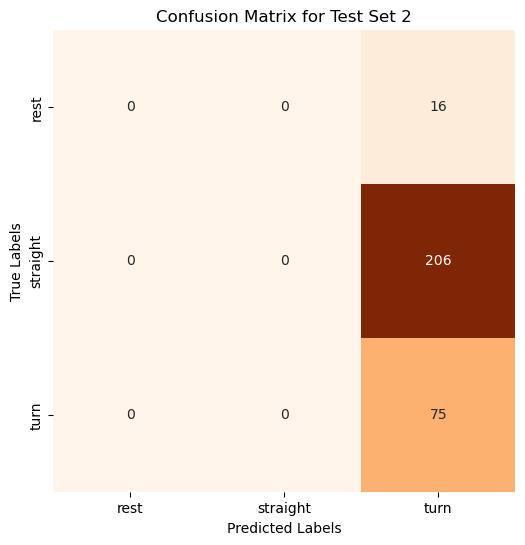

Classification Report for Test Set 1:
              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.00      0.00      0.00       206
        turn       0.25      1.00      0.40        75

    accuracy                           0.25       297
   macro avg       0.08      0.33      0.13       297
weighted avg       0.06      0.25      0.10       297



C:\Users\Daniel Polania\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Daniel Polania\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Daniel Polania\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

# Predict the target values using the trained model for test_set2
y_pred2 = best_model.predict(X2)

# Generate confusion matrix for test_set2
cm2 = confusion_matrix(y2, y_pred2)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Oranges',cbar=False, square=True, xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title("Confusion Matrix for Test Set 2")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Print the classification report for test_set2
print("Classification Report for Test Set 1:")
print(classification_report(y2, y_pred2))

___

#### 1.3.3 - Questions

**Based on results so far**
1. Comment on the model's performances on the datasets *(X_test, y_test)*, *(X1, y1)*, *(X2, y2)*? A significant difference in performance should be observed, what is this an example of? (3 marks)
1. Provide and explain potential causes for the observed behaviour in performance? (3 marks)

#### 1.3.3 - Answers
1. **Dataset (X_test, y_test):** Accuracy: 96%, The model performs exceptionally well, achieving high precision, recall, and F1-scores across all classes.  **Dataset (X1, y1):** Accuracy: 92%, The performance is slightly lower than on X_test, but still robust. The confusion matrix highlights a few more misclassifications than X_test, particularly for the straight and turn classes.  **Dataset (X2, y2):** Accuracy: 25%, The performance drops drastically, with very poor precision, recall, and F1-scores. For example: Class rest: 0% precision, 0% recall, and 0 F1-score.

2. Potential Causes: **Dataset Shift:** Feature Distribution Mismatch: The sensor data in test_set2 (e.g., accelerometer and gyroscope readings) may have different statistical properties compared to the training data (cv_set) or test_set1.  **Imbalanced Class Representation:** The test_set2 dataset appears to have very few samples for the rest class. The lack of representation leads to poor model performance for this class.  **Overfitting to Training Data:** The model might have learned patterns specific to the training data but fails to generalize to unseen data with different characteristics, such as test_set2.

___

## Section 2 - Classification Using *Selected Features* Derived From Inertial Sensor Data (12 Marks)

In this second section, an *SVC* model will be trained and tuned using grid search, however, only *selected features* will be used.

___

### 2.1 Grid Search with Cross Validation (5 Marks)

___

#### 2.1.1 Extract *selected* features and target from *cv_set*

From the *cv_set* dataframe, extract the selected features, listed below, and load them in a new dataframe *X*.
* *ax_var* - variance of accelerometer readings in x
* *ay_var* - variance of accelerometer readings in y
* *az_sum* - sum of accelerometer z readings
* *a_sum* - sum of the norm of accelerometer x, y, z readings
* *gz_var* - variance of gyroscope reading in z

In [ ]:
# TODO - Load selected features from cv_set to X
# (1 marks)
# Extract selected features
selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']
X = cv_set[selected_features]

# Display the first two rows of the selected features
X.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,8.046094e-07,1.319665e-07,9.789349,9.797418,7.446916e-10
1,1.032619e-06,1.073067e-07,9.789095,9.798815,6.983481e-10


In [ ]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']
print("Target vector y - First 5 rows:")
print(y.head())

Target vector y - First 5 rows:
0        rest
1        rest
2    straight
3        turn
4        turn
Name: motion_state, dtype: object


___

#### 2.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the selected feature set.

In [ ]:
# TODO - Perform model training and tuning using `GridSearchCV`

# Perform test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize Pipeline into variable pipe

pipe = Pipeline([
    ('scaler', StandardScaler()),  # Scaler step
    ('svm', SVC(random_state=42))  # SVC step with a fixed random_state for reproducibility
])

# print the pipeline to verify
print(pipe)

#Setup grid set


param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],  # Different scalers to test
    'svm__C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter (C)
    'svm__gamma': [0.001, 0.01, 0.1, 1],  # Gamma values to test
    'svm__kernel': ['rbf']  # Using Radial Basis Function (RBF) kernel
}
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(random_state=42))])


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC(random_state=42))]),
             param_grid={'scaler': [StandardScaler(), RobustScaler(), None],
                         'svm__C': [0.01, 0.1, 1, 10, 100],
                         'svm__gamma': [0.001, 0.01, 0.1, 1],
                         'svm__kernel': ['rbf']},
             return_train_score=True, scoring='accuracy')

___

#### 2.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search
# 1. Best parameter set
print("Best parameter set:")
print(grid.best_params_)

# 2. Best cross-validation train score
# grid.cv_results_['mean_train_score'] gives the mean train score for each parameter set
best_train_score = grid.best_score_
print("\nBest cross-validation train score:")
print(best_train_score)

# 3. Best cross-validation test score
# To access the best cross-validation test score, we need to retrieve it from the grid's result
# grid.best_index_ gives the index of the best performing model based on the grid search
best_index = grid.best_index_
best_test_score = grid.cv_results_['mean_test_score'][best_index]
print("\nBest cross-validation test score:")
print(best_test_score)

# 4. Test set accuracy (score on the independent test set)
# After finding the best model, we can evaluate it on the test set (X_test, y_test)
test_score = grid.best_estimator_.score(X_test, y_test)
print("\nTest set accuracy:")
print(test_score)

Best parameter set:
{'scaler': RobustScaler(), 'svm__C': 100, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}

Best cross-validation train score:
0.8210562921104108

Best cross-validation test score:
0.8210562921104108

Test set accuracy:
0.8264642082429501


Display the confusion matrix and print the classification report for the trained model using the *test* split.

In [ ]:
# TODO - Display confusion matrix and print classification reports

___

#### 2.1.4 - Question


1. Consider the differences between the performance on the training/cross-validation dataset for section 1 (1.2.3) and section 2 (2.1.3). Which model is a better fit based on *just these two evaluations*? (4 marks)

#### 2.1.4 Answer
### **1.** **Model Fit and Performance:** *Section 1:* High accuracy (0.96) and balanced performance across all classes.  *Section 2:* Lower validation accuracy (0.83) with poor performance on the turn class. High recall for the rest class but significant drop for turn, indicating inconsistency. **Feature Set Differences:** *Section 1:* Uses all features, providing more information for the model to capture complex relationships.  *Section 2:* Uses only five selected features, simplifying the model but sacrificing performance.
### **Section 1's model is a better fit** based on these evaluations: Achieves higher validation and test set accuracy. Demonstrates balanced performance across all classes, without significant drop in any specific class. Handles the turn class much better than the Section 2 model.

___

### 2.2 - Model Evaluation on Test Datasets 1 and 2 (7 Marks)

___

#### 2.2.1 - Extract selected features and targets from test datasets

The model trained in 2.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into the selected features and target vectors *(X1, y1)* and (X2,)

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
# (1 marks)
# Extract the target vector and selected features from test_set1
y1 = test_set1['motion_state']  # Assuming 'motion_state' is the target column
X1 = test_set1[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]  # Selected features

# Display the first 2 rows of X1 to verify
X1.head(2)


,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000001,7.749919e-08,9.786930,9.801661,7.727190e-10
1,0.000001,9.243000e-08,9.788127,9.802481,8.871433e-10


In [ ]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
# Extract the target vector and selected features from test_set1
y2 = test_set2['motion_state']  # Assuming 'motion_state' is the target column
X2 = test_set2[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]  # Selected features

# Display the first 2 rows of X2 to verify
X2.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000002,3.020959e-07,9.791451,9.800683,1.405038e-09
1,0.000003,6.859937e-07,9.785619,9.797741,1.164381e-09


___

#### 2.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
# Get the best model from the grid search
best_model = grid.best_estimator_

# Calculate and print the accuracy for test_set1
test_accuracy1 = best_model.score(X1, y1)
print(f"Test Set 1 Accuracy: {test_accuracy1:.4f}")

# Calculate and print the accuracy for test_set2
test_accuracy2 = best_model.score(X2, y2)
print(f"Test Set 2 Accuracy: {test_accuracy2:.4f}")

Test Set 1 Accuracy: 0.8289
Test Set 2 Accuracy: 0.8418


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

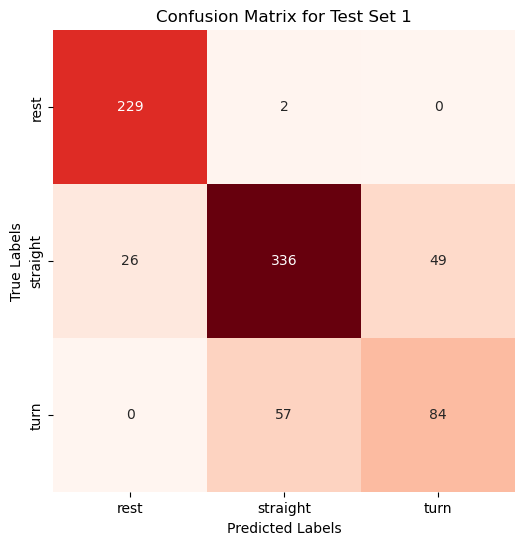

Classification Report for Test Set 1:
              precision    recall  f1-score   support

        rest       0.90      0.99      0.94       231
    straight       0.85      0.82      0.83       411
        turn       0.63      0.60      0.61       141

    accuracy                           0.83       783
   macro avg       0.79      0.80      0.80       783
weighted avg       0.83      0.83      0.83       783



In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

# Predict the target values using the trained model for test_set1
y_pred1 = best_model.predict(X1)

# Generate confusion matrix for test_set1
cm1 = confusion_matrix(y1, y_pred1)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Reds',cbar=False, square=True, xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title("Confusion Matrix for Test Set 1")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Print the classification report for test_set1
print("Classification Report for Test Set 1:")
print(classification_report(y1, y_pred1))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

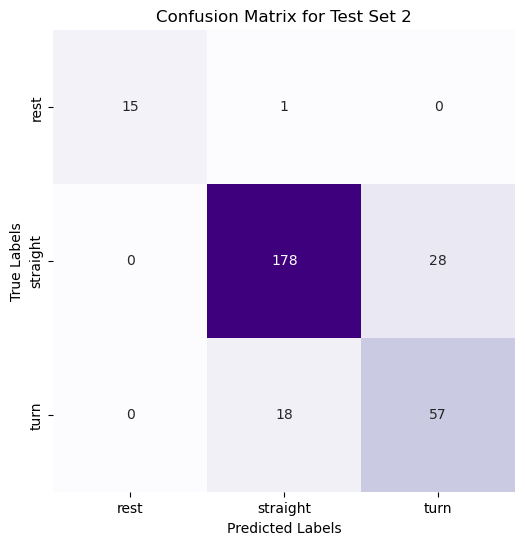

Classification Report for Test Set 1:
              precision    recall  f1-score   support

        rest       1.00      0.94      0.97        16
    straight       0.90      0.86      0.88       206
        turn       0.67      0.76      0.71        75

    accuracy                           0.84       297
   macro avg       0.86      0.85      0.85       297
weighted avg       0.85      0.84      0.84       297



In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
# Predict the target values using the trained model for test_set1
y_pred2 = best_model.predict(X2)

# Generate confusion matrix for test_set2
cm2 = confusion_matrix(y2, y_pred2)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Purples',cbar=False, square=True, xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title("Confusion Matrix for Test Set 2")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Print the classification report for test_set2
print("Classification Report for Test Set 1:")
print(classification_report(y2, y_pred2))

___

#### 2.2.3 Questions

1. For section 2, compare between the model's performance on the training/validation (2.1) set to the the performance on the two testing sets (2.2). How does the model fit? (3 marks)
1. Compare the models' performances and fits between section 1 and section 2, and consider all three datasets. (3 marks)

#### 2.2.3 Answers
### **1.** The model performs consistently between the validation set and the independent test sets (0.82–0.84 accuracy range), suggesting it generalizes reasonably well. However, its fit is imbalanced across classes: rest and straight are handled well, but the turn class consistently underperforms due to lower recall and precision, highlighting a weakness in the model’s ability to differentiate this class.


### **2.** **Model Complexity and Features:** Section 1 uses all features, allowing it to capture more complex relationships, resulting in better overall performance.  Section 2 simplifies the model with fewer features, leading to reduced accuracy and imbalanced class performance.  **Generalization:** Section 1 generalizes better across all datasets, achieving high performance consistently.  Section 2 struggles with the turn class due to limited feature representation.  **Class Performance:** Section 1: Balanced performance across all classes.  Section 2: Stronger performance for rest and straight, but significantly weaker for turn.

____

## Section 3 - Classification Using *Group Selected Features* From Inertial Sensor Data (10 Marks)

Once again, an *SVC* model is to be trained and tuned using grid search. However, you must select which features to use from the ones provided in *cv_set*.  

____

### 3.1 Grid Search with Cross Validation (4 Marks)

___

#### 3.1.1 Extract *Group Selected* features and target from *cv_set*

**Question**
1. Please list the features that you have selected and explain *why you have chosen* these features? (4 marks)


**Answer**
1.   

In [ ]:
# TODO - Load group selected features from cv_set to X
# X =
X.head(2)

In [ ]:
# TODO - Load motion_state column (target vector) into y
# y =

___

#### 3.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the group selected feature set.

In [ ]:
# TODO - Perform model training and tuning using `GridSearchCV`

___

#### 3.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search

#print("Best params:\n{}\n".format(???))
#print("Best cross-validation train score: {:.2f}".format(???))
#print("Best cross-validation validation score: {:.2f}".format(???))
#print("Test-set score: {:.2f}".format(???)))

Display the confusion matrix and print the classification report for the trained model using the *test* split.

In [ ]:
# TODO - Display confusion matrix and print classification report

___

### 3.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 3.2.1 - Extract group selected features and targets from test datasets

The model trained in 3.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into group selected features and target vectors *(X1, y1)* and *(X2,y2)*

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and the group selected features from test_set1 into X1
# y1 =
# X1 =
X1.head(2)

In [ ]:
# TODO - Load the target vector from test_set2 into y2, and the group selected features from test_set2 into X2
# y2 =
# X2 =
X2.head(2)

___

#### 3.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
#print("test_set1 score: {:.2f}".format(???))
#print("test_set2 score: {:.2f}".format(???))

Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

___

#### 3.2.3 Questions

1. Based on the observations across all three datasets, compare the performance of the model trained in this section to: (3 marks)
    1. Model trained in Section 1 using *all features*.
    1. Model trained in Section 2 using *selected features*.

2. Please proivde potential explanations for the differences observed in models' performances across the three sections. (3 marks)

#### 3.2.3 Answers
1.
1.

____

## Section 4 - Classification Using Principal Components of Features From Inertial Sensor Data (10 Marks)

____

### 4.1 Principal Component Analysis (PCA) Search with Cross Validation (4 Marks)

___

#### 4.1.1 Extract *ALL* features and target from *cv_set*

In [ ]:
# TODO - Load all features from cv_set to X
# X =
X.head(2)

In [ ]:
# TODO - Load motion_state column (target vector) into y
# y =

___

#### 4.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning for an `SVC` model. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [ ]:
# TODO - Perform model training and tuning using `GridSearchCV`
# X_train, X_test, y_train, y_test =

In the `Pipeline` add an entry *'pca'* to apply `PCA`.

In [ ]:
# Perform any missing imports

# TODO - Initiate the pipeline
# (1 marks)
# pipe =

Similar to previous sections, define the grid search configuration (*param_grid*). Add *n_components* hyper parameter tuning for PCA, and search over the values `n_components=[4,7,11,14,16]`.  

In [ ]:
# TODO - Define the parameter grid for your model
# (3 marks)
# param_grid =

In [ ]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

___

#### 4.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search

#print("Best params:\n{}\n".format(???))
#print("Best cross-validation train score: {:.2f}".format(???))
#print("Best cross-validation validation score: {:.2f}".format(???))
#print("Test-set score: {:.2f}".format(???)))

Display the confusion matrix and print the classification report for the trained model using the *test* split.

In [ ]:
# TODO - Display confusion matrix and print classification report

___

### 4.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 4.2.1 - Extract group selected features and targets from test datasets

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
# y1 =
# X1 =
X1.head(2)

In [ ]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
# y2 =
# X2 =
X2.head(2)

___

#### 4.2.2 - Visualize Results

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
#print("test_set1 score: {:.2f}".format(???))
#print("test_set2 score: {:.2f}".format(???))

In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

___

#### 4.2.3 - Questions

1. Based on the observations across all three datasets, compare the performance of the model with PCA, trained in this section to: (4 marks)
    * Model trained in Section 1 using *all features*.
    * Model trained in Section 2 using *selected features*.
    * Model trained in Section 3 using *group selected features*

2. Please provide potential explanations for the differences observed in models' performances across between section 1 and 4. (2 marks)

#### 4.2.3 - Answers

____

## Section 5 - Classification Using *Pre Selected Features* Derived From Inertial Sensor Data (10 Marks)

___

Now, a second classifer is to be trained and tuned using grid search. The **selected features from section 2** must be used. You may choose from one of the algorithms discussed that class listed below.
1. Random Forest
1. K-Nearest Neighbors
1. Gradient Boosting Machines
1. Neural Networks

____

### 5.1 Grid Search with Cross Validation (6 Marks)

___

#### 5.1.1 Extract *Selected* features and target from *cv_set*

**Questions**
1. Please list the ML model that you have selected . And explain *why you have chosen* this model? (2 marks)

   Best Algorithm for the Dataset: Random Forest


**Answer**
### **1.** ML Model Selected: **Random Forest**.  Reason for Choosing Random Forest: **Robustness and Generalization:** Random Forest is an ensemble method that combines multiple decision trees to reduce overfitting, which is a known issue in Section 1’s and Section 2’s models. This robustness allows Random Forest to generalize better to unseen data, such as Test Set 2, where previous models struggled. **Handling Feature Selection:** Random Forest handles feature importance naturally, making it well-suited for datasets with selected features (e.g., the pre-selected features in Section 2). It can identify which features contribute most to classification performance, potentially improving model interpretability.

In [ ]:
# TODO - Load group selected features from cv_set to X
# Extract selected features
selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']
X = cv_set[selected_features]

# Display the first two rows of the selected features
X.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,8.046094e-07,1.319665e-07,9.789349,9.797418,7.446916e-10
1,1.032619e-06,1.073067e-07,9.789095,9.798815,6.983481e-10


In [ ]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']
print("Target vector y - First 5 rows:")
print(y.head())

Target vector y - First 5 rows:
0        rest
1        rest
2    straight
3        turn
4        turn
Name: motion_state, dtype: object


___

#### 5.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning using for the model selected. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# TODO - Perform train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# Perform any missing imports

# TODO - Initiate the pipeline
# (1 mark)
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: StandardScaler
    ('rf', RandomForestClassifier(random_state=42))  # Step 2: Random Forest Classifier
])

print(pipe)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestClassifier(random_state=42))])


In [ ]:
# TODO - Define the parameter grid for your model
# (3 marks)
param_grid = {
    'scaler': [StandardScaler(), None],  # Test StandardScaler and no scaling
    'rf__n_estimators': [100, 200, 300],  # Number of trees (estimators)
    'rf__max_depth': [None, 10, 20, 30],  # Depth of the trees
    'rf__min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'rf__min_samples_leaf': [1, 2, 4],  # Minimum samples required at a leaf node
    'rf__bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

In [ ]:
# TODO - Perform the grid search
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__bootstrap': [True, False],
                         'rf__max_depth': [None, 10, 20, 30],
                         'rf__min_samples_leaf': [1, 2, 4],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [100, 200, 300],
                         'scaler': [StandardScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 5.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search
# 1. Best parameter set
print("Best parameter set:")
print(grid_search.best_params_)

# 2. Best cross-validation train score
# The best score across all folds for the best model
best_train_score = grid_search.best_score_
print("Best cross-validation train score: {:.4f}".format(best_train_score))

# 3. Best cross-validation test score
# Mean test score across all folds for the best model
cv_results = grid_search.cv_results_
mean_test_scores = cv_results['mean_test_score']
best_test_score = mean_test_scores[grid_search.best_index_]
print("Best cross-validation test score: {:.4f}".format(best_test_score))

# 4. Test set accuracy (on the unseen test set)
test_accuracy = grid_search.best_estimator_.score(X_test, y_test)
print("Test set accuracy: {:.4f}".format(test_accuracy))

Best parameter set:
{'rf__bootstrap': True, 'rf__max_depth': 10, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 10, 'rf__n_estimators': 300, 'scaler': StandardScaler()}
Best cross-validation train score: 0.8481
Best cross-validation test score: 0.8481
Test set accuracy: 0.8438


Display the confusion matrix and print the classification report for the trained model using the *test* split.

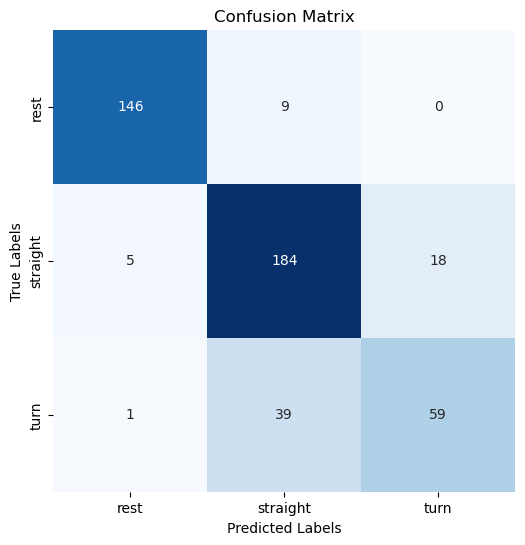

Classification Report:
              precision    recall  f1-score   support

        rest       0.96      0.94      0.95       155
    straight       0.79      0.89      0.84       207
        turn       0.77      0.60      0.67        99

    accuracy                           0.84       461
   macro avg       0.84      0.81      0.82       461
weighted avg       0.84      0.84      0.84       461



In [ ]:
# TODO - Display confusion matrix and print classification report

# Predict the target values for the test set using the best model
y_pred = grid_search.best_estimator_.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=grid_search.best_estimator_.classes_, yticklabels=grid_search.best_estimator_.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

___

### 5.2 - Model Evaluation on Test Datasets 1 and 2 (4 Marks)

___

#### 5.2.1 - Extract selected features and targets from test datasets

The model trained in 5.1, is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into features and target vectors *(X1, y1)* and *(X2,y2)*

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
# Extract the target vector and selected features from test_set1
y1 = test_set1['motion_state']  # Assuming 'motion_state' is the target column
X1 = test_set1[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]  # Selected features

# Display the first 2 rows of X1 to verify
X1.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000001,7.749919e-08,9.786930,9.801661,7.727190e-10
1,0.000001,9.243000e-08,9.788127,9.802481,8.871433e-10


In [ ]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
# Extract the target vector and selected features from test_set1
y2 = test_set2['motion_state']  # Assuming 'motion_state' is the target column
X2 = test_set2[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]  # Selected features

# Display the first 2 rows of X2 to verify
X2.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000002,3.020959e-07,9.791451,9.800683,1.405038e-09
1,0.000003,6.859937e-07,9.785619,9.797741,1.164381e-09


___

#### 5.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
# Get the best model from the grid search
best_model = grid.best_estimator_

# Calculate and print the accuracy for test_set1
test_accuracy1 = best_model.score(X1, y1)
print(f"Test Set 1 Accuracy: {test_accuracy1:.4f}")

# Calculate and print the accuracy for test_set2
test_accuracy2 = best_model.score(X2, y2)
print(f"Test Set 2 Accuracy: {test_accuracy2:.4f}")

Test Set 1 Accuracy: 0.8289
Test Set 2 Accuracy: 0.8418


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

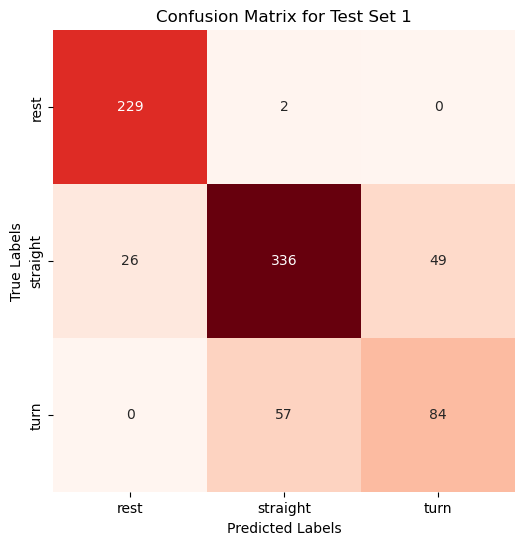

Classification Report for Test Set 1:
              precision    recall  f1-score   support

        rest       0.90      0.99      0.94       231
    straight       0.85      0.82      0.83       411
        turn       0.63      0.60      0.61       141

    accuracy                           0.83       783
   macro avg       0.79      0.80      0.80       783
weighted avg       0.83      0.83      0.83       783



In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)


# Predict the target values using the trained model for test_set1
y_pred1 = best_model.predict(X1)

# Generate confusion matrix for test_set1
cm1 = confusion_matrix(y1, y_pred1)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Reds',cbar=False, square=True, xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title("Confusion Matrix for Test Set 1")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Print the classification report for test_set1
print("Classification Report for Test Set 1:")
print(classification_report(y1, y_pred1))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

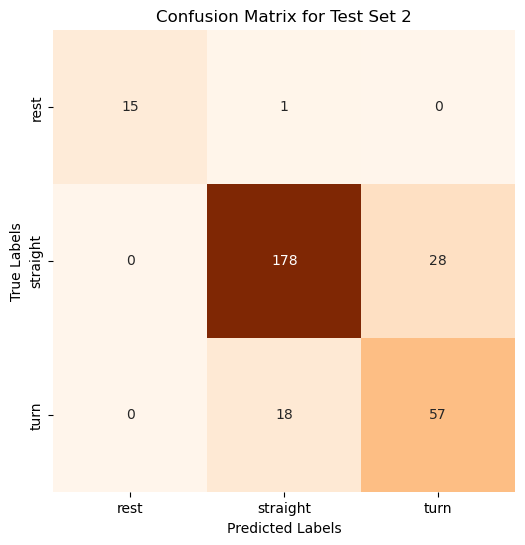

Classification Report for Test Set 2:
              precision    recall  f1-score   support

        rest       0.90      0.99      0.94       231
    straight       0.85      0.82      0.83       411
        turn       0.63      0.60      0.61       141

    accuracy                           0.83       783
   macro avg       0.79      0.80      0.80       783
weighted avg       0.83      0.83      0.83       783



In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)


# Predict the target values using the trained model for test_set2
y_pred2 = best_model.predict(X2)

# Generate confusion matrix for test_set1
cm2 = confusion_matrix(y2, y_pred2)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Oranges',cbar=False, square=True, xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title("Confusion Matrix for Test Set 2")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Print the classification report for test_set2
print("Classification Report for Test Set 2:")
print(classification_report(y1, y_pred1))

___

#### 5.2.3 Question

1. For the model trainied in this section, compare its performance to the performance of SVC which was also trained with the same selected features (section 2). Which model fits better? Explain causes for any observed discrepancies? (4 marks)

#### 5.2.3 - Answer
1. Strengths of Random Forest:
Better generalization on Test Set 1 for majority classes (rest, straight). Recall for turn on Test Set 2 is moderate (0.60), indicating the model captures true positives for this challenging class to some extent.
Weaknesses of Random Forest:
Precision for turn is low on both Test Set 1 and Test Set 2 (0.63), leading to false positives. The model struggles with imbalanced datasets, as evidenced by reduced precision and recall for the minority class.
Strengths of SVC:
More balanced precision and recall across all classes, particularly for the minority turn class. Higher overall accuracy on Test Set 2 (0.84), indicating better generalization to unseen data.
Weaknesses of SVC:
Recall for turn is relatively low on Test Set 1 (0.60) but improves on Test Set 2 (0.76), showing difficulty in capturing true positives for this class initially.
For Test Set 1: Random Forest slightly edges out SVC
Random Forest shows better performance for majority classes with similar overall accuracy (0.83). Its recall for straight (0.82) is slightly higher than SVC's, while its metrics for turn are comparable.
For Test Set 2: SVC performs better due to higher overall accuracy (0.84)
SVC shows better recall for turn (0.76 vs. 0.60 for Random Forest) and more balanced metrics, indicating better generalization to a dataset that differs more from the training set.
Causes of Discrepancies:
1) Algorithm Characteristics:
Random Forest is robust to noise and excels in scenarios with complex feature interactions. However, it can struggle with precision for minority classes due to its ensemble nature. SVC, with appropriate kernels, balances class metrics better but may initially underperform when feature interactions are highly non-linear.
2) Class Imbalance:
Both models struggle with the turn class due to its underrepresentation in the training data. This imbalance likely causes low precision for Random Forest and moderate recall for SVC.
3) Feature Selection:
With the selected features, SVC generalizes better to unseen data (Test Set 2), whereas Random Forest maintains consistent performance but shows limitations for minority classes like turn.




____